# **Image Classification Project**

In this project we are going to build a model which can classify cat, dog, horse and human. We are going to use the inceptionV3 model. We are going to load the weights from a pretrained model. Then we will use our model to develop the multiclass classifier. Primarily it can classify cat, dog, horse, human. The dataset for this project is not lagre. The horse and human data are generated using CGI. So, they are not real. However, our model can identify human and horse from real life photo pretty well.

In [ ]:
import os
import zipfile
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
from google.colab import files
files.upload()

Saving imgdata.zip to imgdata.zip


In [ ]:
path = 'imgdata.zip'
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
base_dir = '/content/imgdata'
train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
train_humans_dir = os.path.join(train_dir, 'humans') #Directory of our training human pictures
train_horses_dir = os.path.join(train_dir, 'horses') #Directory of our training horse pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures
validation_humans_dir = os.path.join(validation_dir, 'humans') #Directory of our validation human pictures
validation_horses_dir = os.path.join(validation_dir, 'horses') #Directory of our validation horse pictures

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
train_human_fnames = os.listdir( train_humans_dir )
train_horse_fnames = os.listdir( train_horses_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print(train_human_fnames[:10])
print(train_horse_fnames[:10])

['cat.67.jpg', 'cat.188.jpg', 'cat.211.jpg', 'cat.341.jpg', 'cat.30.jpg', 'cat.359.jpg', 'cat.470.jpg', 'cat.283.jpg', 'cat.383.jpg', 'cat.159.jpg']
['dog.197.jpg', 'dog.91.jpg', 'dog.369.jpg', 'dog.448.jpg', 'dog.457.jpg', 'dog.298.jpg', 'dog.394.jpg', 'dog.221.jpg', 'dog.470.jpg', 'dog.42.jpg']
['human10-19.png', 'human13-15.png', 'human07-26.png', 'human16-04.png', 'human01-18.png', 'human10-24.png', 'human03-14.png', 'human09-30.png', 'human17-22.png', 'human08-19.png']
['horse19-7.png', 'horse43-7.png', 'horse06-9.png', 'horse29-9.png', 'horse04-9.png', 'horse08-5.png', 'horse26-3.png', 'horse36-1.png', 'horse15-3.png', 'horse20-8.png']


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
train_human_fnames = os.listdir(train_humans_dir)
train_horse_fnames = os.listdir(train_horses_dir)

In [ ]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',# we should use 'binary' for binary image classification
  batch_size=50
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',# we should use 'binary' for binary image classification
  batch_size=20
)


Found 2000 images belonging to 4 classes.
Found 512 images belonging to 4 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-05-03 23:17:35--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 172.253.117.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   156MB/s    in 0.5s    

2021-05-03 23:17:36 (156 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, #Just ignoring InceptionV3 fully connected layers
                                weights= None) #  we will load our downloaded weights
pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers:
  layer.trainable = False #freeze the layers in the model
  
pre_trained_model.summary()
last_layer = pre_trained_model.get_layer('mixed9') #check the summar we can select any arbitrary layer
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# Flatten the output layer to 1 dimension
x = Flatten()(last_output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x) 
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)   
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)  
x = Dense (4, activation='softmax')(x)           
model = Model( pre_trained_model.input, x) 
model.compile(optimizer =tf.keras.optimizers.RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
#early_stop=EarlyStopping(monitor='loss',patience=2)
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 40,   # 2000 images=batch_size*steps_per_epoch
            epochs = 200,
            validation_steps = 25)
           

Epoch 1/200
40/40 [==============================] - 29s 512ms/step - loss: 0.8291 - accuracy: 0.6783 - val_loss: 0.1544 - val_accuracy: 0.9420
Epoch 2/200
40/40 [==============================] - 19s 467ms/step - loss: 0.2107 - accuracy: 0.9161 - val_loss: 0.0860 - val_accuracy: 0.9640
Epoch 3/200
40/40 [==============================] - 18s 460ms/step - loss: 0.1614 - accuracy: 0.9416 - val_loss: 0.0676 - val_accuracy: 0.9760
Epoch 4/200
40/40 [==============================] - 18s 459ms/step - loss: 0.1155 - accuracy: 0.9554 - val_loss: 0.0994 - val_accuracy: 0.9600
Epoch 5/200
40/40 [==============================] - 18s 462ms/step - loss: 0.1112 - accuracy: 0.9598 - val_loss: 0.1371 - val_accuracy: 0.9500
Epoch 6/200
40/40 [==============================] - 18s 461ms/step - loss: 0.1082 - accuracy: 0.9556 - val_loss: 0.0657 - val_accuracy: 0.9780
Epoch 7/200
40/40 [==============================] - 19s 463ms/step - loss: 0.0665 - accuracy: 0.9741 - val_loss: 0.0925 - val_accuracy:

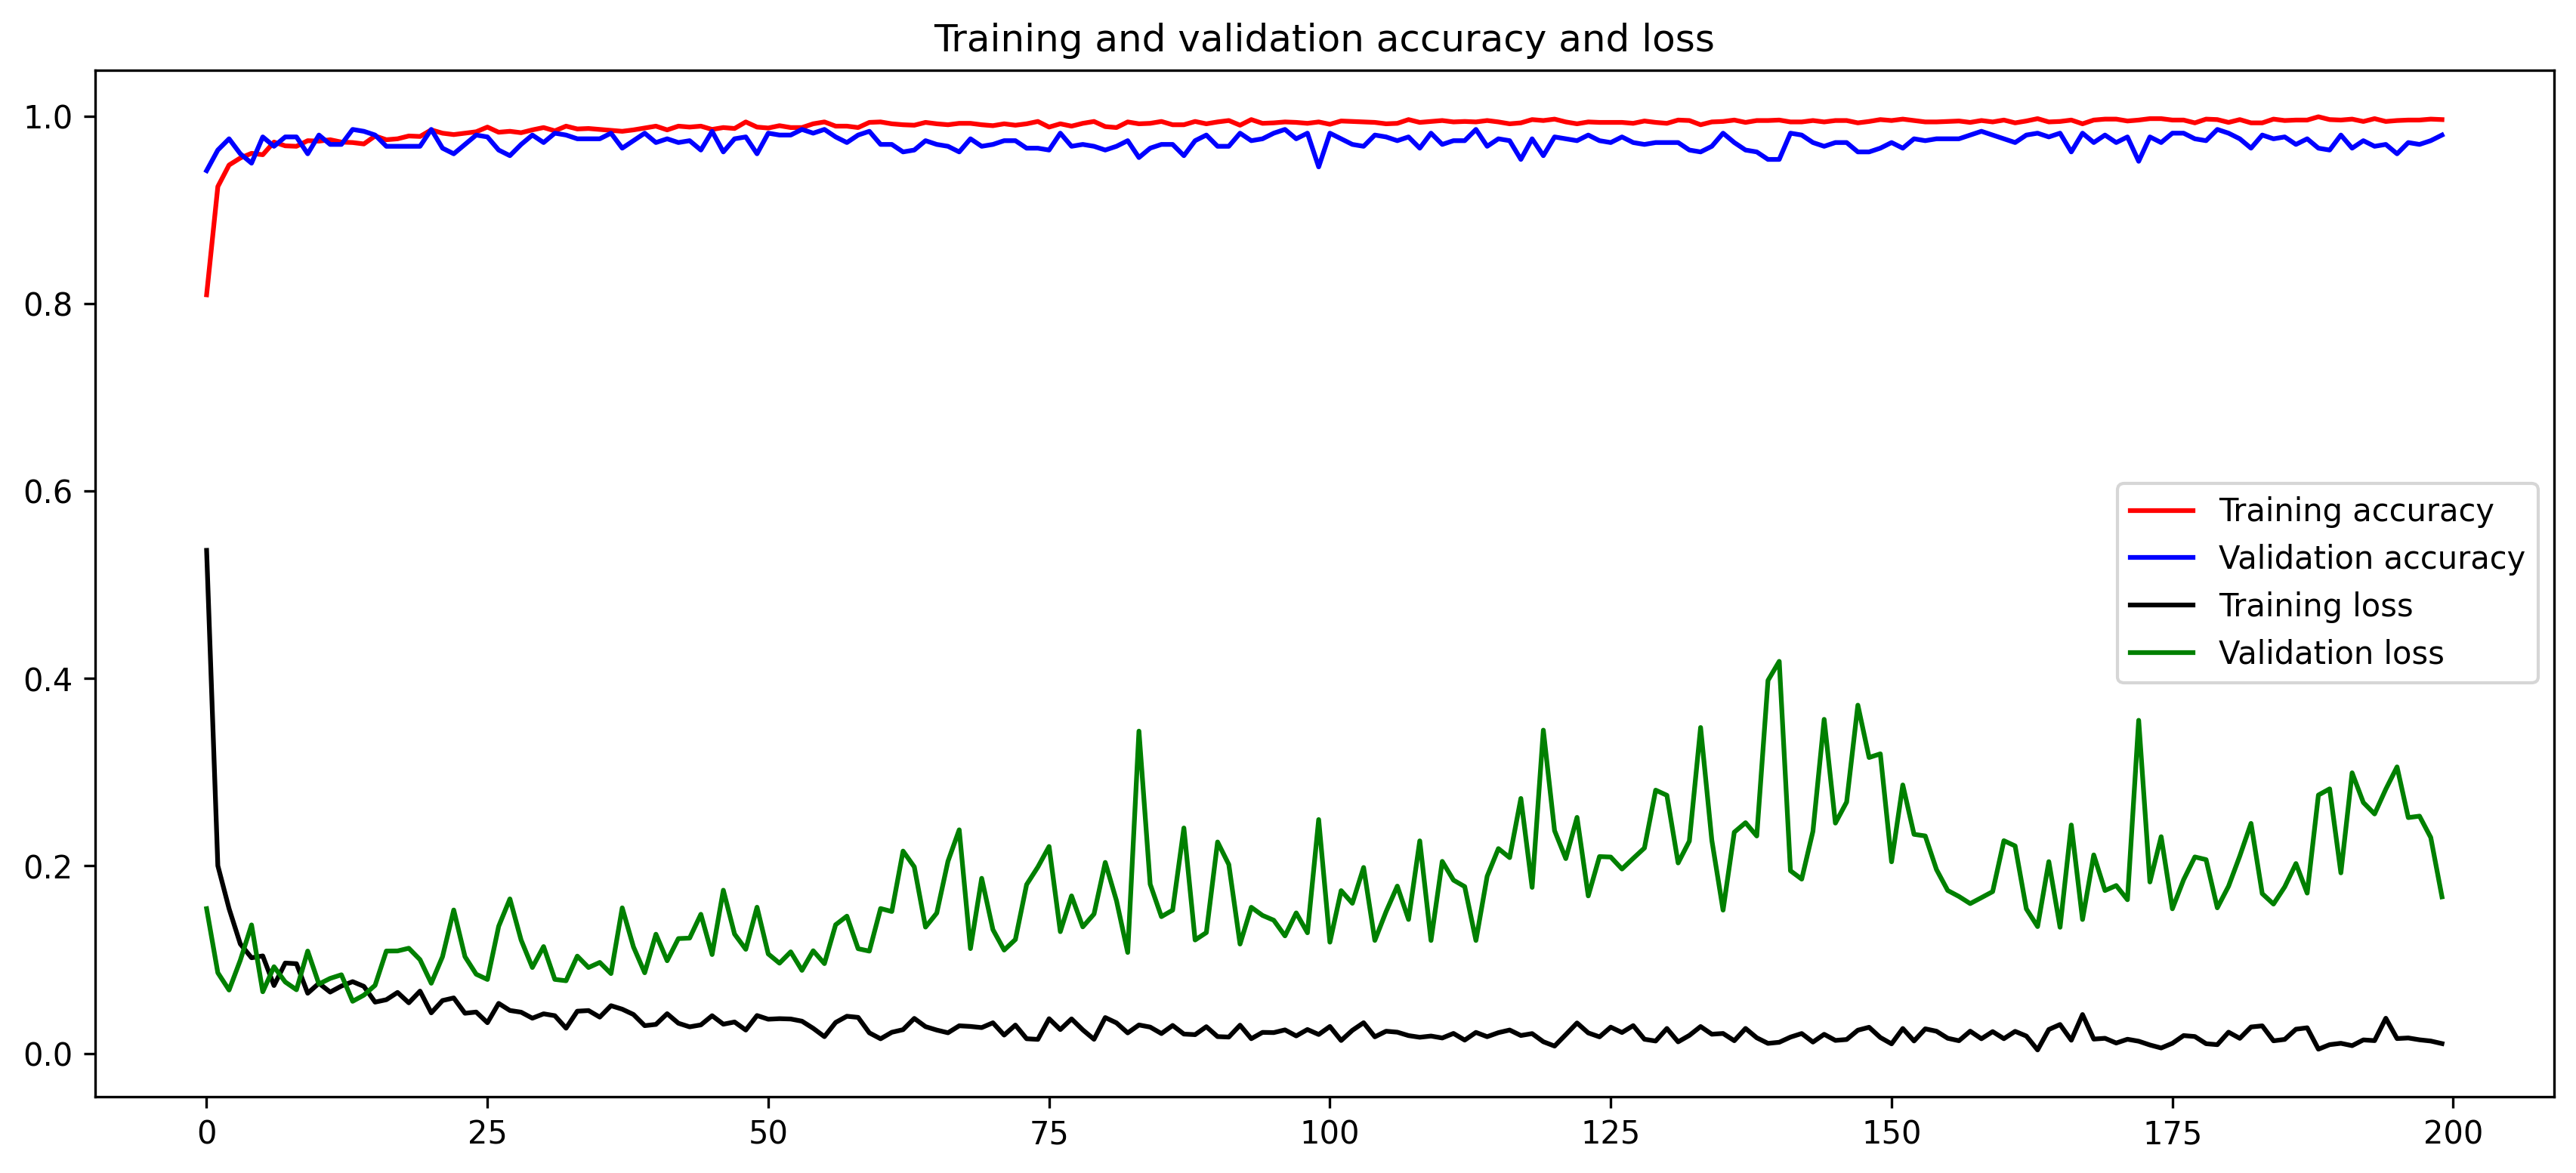

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(14,6),dpi=300)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'black', label='Training loss')
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training and validation accuracy and loss')
#plt.legend(loc=0)
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)/255.0
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images)
  
  print(classes.argmax(axis=1)[0])
  #print(classes[0])
  if classes.argmax(axis=1)[0]==0:
    print(fn + " is a cat")
  elif classes.argmax(axis=1)[0]==1:
    print(fn + " is a dog")
  elif classes.argmax(axis=1)[0]==2:
    print(fn + " is horse")
  else:
    print(fn + " is human")
  


Saving AdobeStock_326500445-1-scaled.jpeg to AdobeStock_326500445-1-scaled.jpeg
2
AdobeStock_326500445-1-scaled.jpeg is horse


In [ ]:
model.save("imgclass.h5")